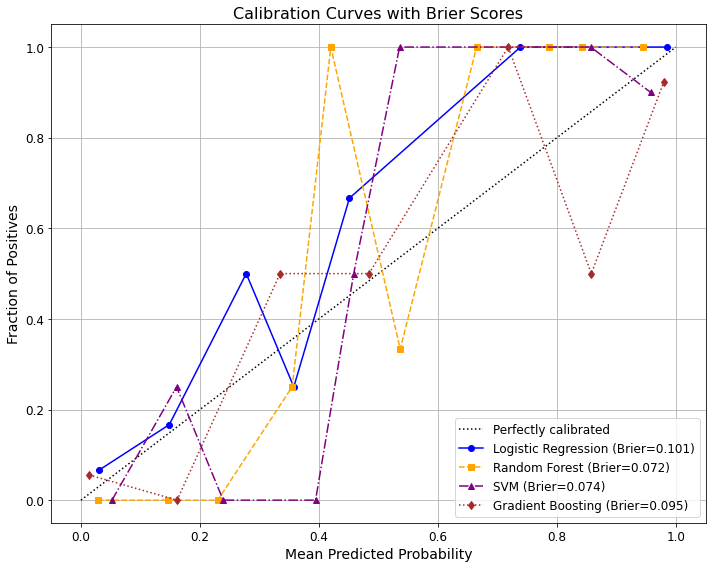

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# 加载数据集
file_path = 'D:\\ml\\DQ\\0904.xlsx'  
data = pd.read_excel(file_path)

# 分割数据集
X = data.drop('death', axis=1)
y = data['death']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化模型
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# 训练模型
logreg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

# 获取模型预测概率
logreg_probs = logreg.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf.predict_proba(X_test_scaled)[:, 1]
gb_probs = gb.predict_proba(X_test_scaled)[:, 1]
svm_probs = svm.predict_proba(X_test_scaled)[:, 1]

# 计算Brier Score
logreg_brier = brier_score_loss(y_test, logreg_probs)
rf_brier = brier_score_loss(y_test, rf_probs)
gb_brier = brier_score_loss(y_test, gb_probs)
svm_brier = brier_score_loss(y_test, svm_probs)

# 绘制校准曲线
fig, ax = plt.subplots(figsize=(10, 8))

CalibrationDisplay.from_predictions(y_test, logreg_probs, n_bins=10, ax=ax, name=f'Logistic Regression (Brier={logreg_brier:.3f})', color='blue', linestyle='-', marker='o')
CalibrationDisplay.from_predictions(y_test, rf_probs, n_bins=10, ax=ax, name=f'Random Forest (Brier={rf_brier:.3f})', color='orange', linestyle='--', marker='s')
CalibrationDisplay.from_predictions(y_test, svm_probs, n_bins=10, ax=ax, name=f'SVM (Brier={svm_brier:.3f})', color='purple', linestyle='-.', marker='^')
CalibrationDisplay.from_predictions(y_test, gb_probs, n_bins=10, ax=ax, name=f'Gradient Boosting (Brier={gb_brier:.3f})', color='brown', linestyle=':', marker='d')

# 自定义图形以提高可读性
plt.xlabel('Mean Predicted Probability', fontsize=14)
plt.ylabel('Fraction of Positives', fontsize=14)
plt.title('Calibration Curves with Brier Scores', fontsize=16)
plt.legend(loc="lower right", fontsize=12)  
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# 显示图形
plt.savefig("calibration_curve.pdf")
plt.show()